In [92]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '/Volumes/L/Part01'

In [93]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


#### Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

In [95]:
import seaborn as sns

I. 找出如期繳貸款（target=boolean）相關的變項，其中年齡相對有明顯的影響

In [96]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


i. 以年紀為例，以敘述性統計指標、分佈圖等觀察該變項

A. 敘述性統計指標

In [97]:
age_year=abs(app_train['DAYS_BIRTH']/365)
age_year.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

B. 年齡分佈圖

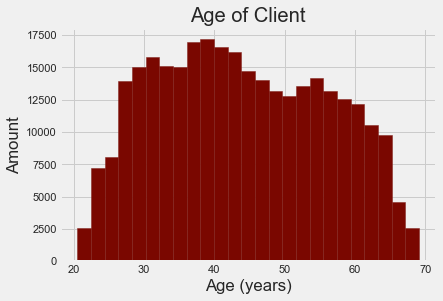

In [98]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
abs_age=abs(app_train['DAYS_BIRTH'])
plt.hist(abs_age / 365, facecolor='#7a0700', edgecolor = '#84241e', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Amount');

C.依性別區分，畫出年齡分佈

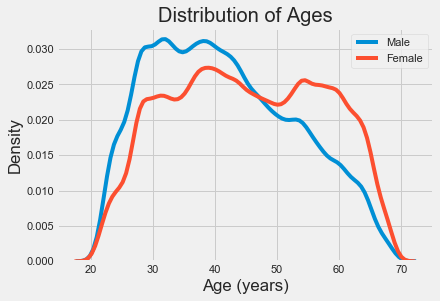

In [99]:
#plt.style.use('fivethirtyeight')

# KDE plot of age distribution that seperate from gender
sns.kdeplot(abs(app_train.loc[app_train['CODE_GENDER']=='M', 'DAYS_BIRTH'] / 365), label = 'Male')

sns.kdeplot(abs(app_train.loc[app_train['CODE_GENDER']=='F', 'DAYS_BIRTH'] / 365), label = 'Female')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

D. 依償還結果檢視各年齡層的分佈

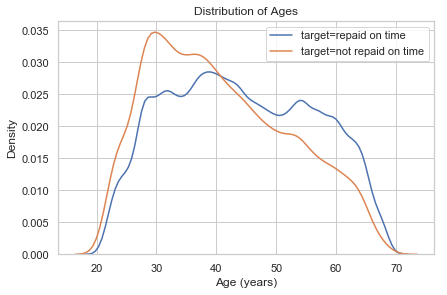

In [106]:
plt.figure(figsize = (6, 4))

# KDE plot of loans that were repaid on time
sns.kdeplot(abs(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365), label = 'target=repaid on time')

# KDE plot of loans which were not repaid on time
sns.kdeplot(abs(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365), label = 'target=not repaid on time')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

II. 試畫出「借方薪水」和「借貸商品金額」的相關性

 i. 列出前10列的值，檢視欄位內容

In [101]:
app_train.loc[:,['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']].head(10)

,AMT_INCOME_TOTAL,AMT_GOODS_PRICE
0,202500.0,351000.0
1,270000.0,1129500.0
2,67500.0,135000.0
3,135000.0,297000.0
4,121500.0,513000.0
5,99000.0,454500.0
6,171000.0,1395000.0
7,360000.0,1530000.0
8,112500.0,913500.0
9,135000.0,405000.0


ii. 以盒鬚圖查看兩個欄位的分佈

Text(0.5, 1.0, 'Boxplot of AMT_GOODS_PRICE')

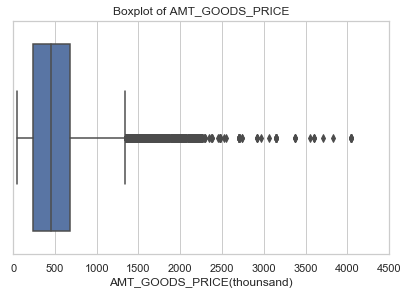

In [102]:
#以盒鬚圖呈現借貸商品金額的分佈
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
ax = sns.boxplot(x=app_train['AMT_GOODS_PRICE']/1000)
ax.set(xlim=(0, 4500))
plt.xlabel('AMT_GOODS_PRICE(thounsand)')
plt.title('Boxplot of AMT_GOODS_PRICE')

Text(0.5, 1.0, 'Boxplot of AMT_INCOME_TOTAL')

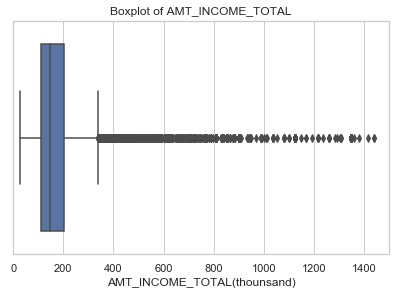

In [103]:
#以盒鬚圖呈現借方薪水的分佈
ax = sns.boxplot(x=app_train['AMT_INCOME_TOTAL']/1000)
ax.set(xlim=(0, 1500))
plt.xlabel('AMT_INCOME_TOTAL(thounsand)')
plt.title('Boxplot of AMT_INCOME_TOTAL')

iii. 以散佈圖（scatter plot）敘述兩個變項的相關性

(0, 4500)

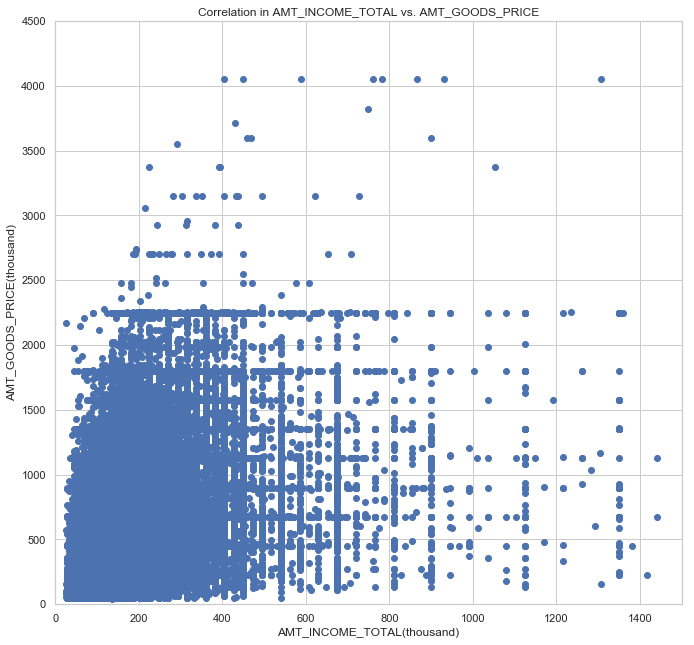

In [104]:
plt.figure(figsize=(10,10))
plt.scatter(app_train['AMT_INCOME_TOTAL']/1000, app_train['AMT_GOODS_PRICE']/1000)
plt.title('Correlation in %s vs. %s' % ('AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE'))
plt.xlabel('AMT_INCOME_TOTAL(thousand)')
plt.ylabel('AMT_GOODS_PRICE(thousand)')
plt.xlim(0,1500)
plt.ylim(0,4500)